In [1]:
import pandas as pd
import numpy as np

In [ ]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    #Bounding box given as a 4-tuple defining the left, upper, right, and lower pixel coordinates.
    #If the image is completely empty, this method returns None.
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [ ]:
# run this cell to crop extra white spaces from images

'''from PIL import Image 
from PIL import ImageFilter 
import os 
from tqdm.auto import tqdm
  
# path of the folder containing the raw images 
inPath ="/Users/tonyzhang/Desktop/Sneaker Project/farfetch_images"
  
# path of the folder that will contain the modified image 
outPath ="/Users/tonyzhang/Desktop/Sneaker Project/farfetch_images_cropped"
  
for imagePath in tqdm(os.listdir(inPath)): 
    # imagePath contains name of the image  
    inputPath = os.path.join(inPath, imagePath) 
  
     # inputPath contains the full directory name 
    try:
        img = Image.open(inputPath) 

        fullOutPath = os.path.join(outPath, imagePath) 
        # fullOutPath contains the path of the output 
        # image that needs to be generated 
        img = trim(img)
        img.save(fullOutPath) 
    except:
        pass'''

# 1. Read in StockX data and perform preprocessing

In [2]:
df1=pd.read_csv('stockx_sneaker_data.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shoe_name         1000 non-null   object 
 1   retail_price_usd  910 non-null    float64
 2   last_sale_usd     818 non-null    float64
 3   avg_sale_usd      782 non-null    float64
 4   avg_profit        782 non-null    float64
 5   image_name        863 non-null    object 
 6   image_link        868 non-null    object 
 7   source            1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [7]:
# use retail_price if average_sale_price is not available, 

df1['avg_sale_usd'] = df1.apply(
    lambda row: row['retail_price_usd'] if np.isnan(row['avg_sale_usd']) else row['avg_sale_usd'],
    axis=1
)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shoe_name         1000 non-null   object 
 1   retail_price_usd  910 non-null    float64
 2   last_sale_usd     818 non-null    float64
 3   avg_sale_usd      910 non-null    float64
 4   avg_profit        782 non-null    float64
 5   image_name        863 non-null    object 
 6   image_link        868 non-null    object 
 7   source            1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [26]:
df1_clean = df1.copy()

In [27]:
df1_clean = df1_clean[df1_clean[['avg_sale_usd', 'image_name']].notna()]

In [28]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shoe_name         0 non-null      object 
 1   retail_price_usd  0 non-null      float64
 2   last_sale_usd     0 non-null      float64
 3   avg_sale_usd      910 non-null    float64
 4   avg_profit        0 non-null      float64
 5   image_name        863 non-null    object 
 6   image_link        0 non-null      object 
 7   source            0 non-null      object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [30]:
# dropping all columns except avg_sale_usd and image_name

stockx_df = df1_clean[['avg_sale_usd', 'image_name']]

In [31]:
stockx_df = stockx_df.rename(columns = {'avg_sale_usd': 'sale_price'})

In [32]:
stockx_df.head()

,sale_price,image_name
0,235.0,stockx_shoe1.jpg
1,238.0,stockx_shoe2.jpg
2,256.0,stockx_shoe3.jpg
3,306.0,stockx_shoe4.jpg
4,267.0,stockx_shoe5.jpg


In [33]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_price  910 non-null    float64
 1   image_name  863 non-null    object 
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [34]:
# dropping all NaN

stockx_df = stockx_df.dropna()

In [35]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_price  824 non-null    float64
 1   image_name  824 non-null    object 
dtypes: float64(1), object(1)
memory usage: 19.3+ KB


# 2. Read in Farfetch data and perform preprocessing

In [2]:
df2 = pd.read_csv('farfect_sneaker_data.csv')

In [3]:
df2.describe()

,retail_price_usd,last_sale_usd,avg_sale_usd,avg_profit
count,12035.000000,0.0,0.0,0.0
mean,556.656917,NaN,NaN,NaN
std,756.998832,NaN,NaN,NaN
min,22.000000,NaN,NaN,NaN
25%,262.000000,NaN,NaN,NaN
50%,465.000000,NaN,NaN,NaN
75%,703.000000,NaN,NaN,NaN
max,38538.000000,NaN,NaN,NaN


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12054 entries, 0 to 12053
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shoe_name         12042 non-null  object 
 1   retail_price_usd  12035 non-null  float64
 2   last_sale_usd     0 non-null      float64
 3   avg_sale_usd      0 non-null      float64
 4   avg_profit        0 non-null      float64
 5   image_name        12034 non-null  object 
 6   image_link        12037 non-null  object 
 7   source            12054 non-null  object 
dtypes: float64(4), object(4)
memory usage: 753.5+ KB


In [5]:
farfetch_df = df2.copy()

In [6]:
farfetch_df = farfetch_df[['retail_price_usd', 'image_name']]

In [7]:
farfetch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12054 entries, 0 to 12053
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   retail_price_usd  12035 non-null  float64
 1   image_name        12034 non-null  object 
dtypes: float64(1), object(1)
memory usage: 188.5+ KB


In [8]:
farfetch_df = farfetch_df.dropna()

In [9]:
farfetch_df = farfetch_df.rename(columns = {'retail_price_usd': 'sale_price'})

In [10]:
farfetch_df.head()

,sale_price,image_name
0,431.0,farfetch_shoe1.jpg
1,802.0,farfetch_shoe2.jpg
2,1149.0,farfetch_shoe3.jpg
3,1383.0,farfetch_shoe4.jpg
4,763.0,farfetch_shoe5.jpg


# 3. Combining StockX and Farfetch data and final cleaning steps

In [51]:
sneaker_df = farfetch_df.append(stockx_df)

In [52]:
sneaker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12856 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_price  12856 non-null  float64
 1   image_name  12856 non-null  object 
dtypes: float64(1), object(1)
memory usage: 301.3+ KB


In [ ]:
sneaker_df.to_csv('sneaker_data_raw.csv', index=False)

In [4]:
df_clipped.describe()

,sale_price
count,12594.000000
mean,508.285453
std,327.588974
min,76.000000
25%,253.000000
50%,456.000000
75%,690.000000
max,1998.000000


In [ ]:
# according to IQR analysis, prices in sale_price > 1376 are considered outliers
sneaker_clipped = sneaker_df[sneaker_df['sale_price'] < 1400]

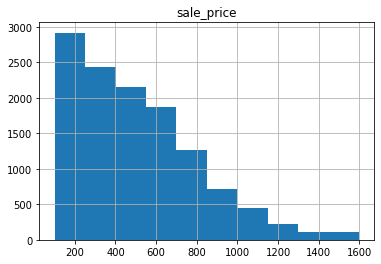

In [6]:
sneaker_clipped.hist();

In [8]:
#shuffle the data to avoid bias
sneaker_clipped=sneaker_clipped.sample(frac=1).reset_index(drop=True)

In [9]:
df_clipped.to_csv('sneaker_data_clipped.csv', index=False)

In [10]:
df_clipped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12253 entries, 0 to 12252
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_price  12253 non-null  float64
 1   image_name  12253 non-null  object 
dtypes: float64(1), object(1)
memory usage: 191.6+ KB


In [11]:
df_clipped_train = df_clipped_shuffled[:8577]
df_clipped_test = df_clipped_shuffled[8577:]

In [13]:
df_clipped_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_price  8577 non-null   float64
 1   image_name  8577 non-null   object 
dtypes: float64(1), object(1)
memory usage: 134.1+ KB


In [14]:
df_clipped_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 8577 to 12252
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_price  3676 non-null   float64
 1   image_name  3676 non-null   object 
dtypes: float64(1), object(1)
memory usage: 57.6+ KB


In [15]:
df_clipped_train.to_csv('sneaker_data_clipped_train.csv', index=False)
df_clipped_test.to_csv('sneaker_data_clipped_test.csv', index=False)